<a href="https://colab.research.google.com/github/ikiakmal15/TI11_RIFQ_0110224225/blob/main/Praktikum_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/latihan ML pertemuan ke 7/data/apples_and_oranges.csv"

In [4]:
import pandas as pd

df = pd.read_csv(path)
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [15]:
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [16]:
df["Class"].unique()

array(['orange', 'apple'], dtype=object)

In [19]:
df["Class"].value_counts()

,count
Class,
orange,20
apple,20


In [20]:
x = df[['Size', 'Weight']]

y = df['Class']

In [21]:
x.head()

,Size,Weight
0,4.39,69
1,4.21,69
2,4.09,65
3,5.85,72
4,4.70,67


In [22]:
y.head()

,Class
0,orange
1,orange
2,orange
3,apple
4,orange


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [24]:
y_pred = model.predict(x_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nLaporan Klassifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 100.00%

Laporan Klassifikasi:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00         3
      orange       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8




Confusion Matrix:
 [[3 0]
 [0 5]]


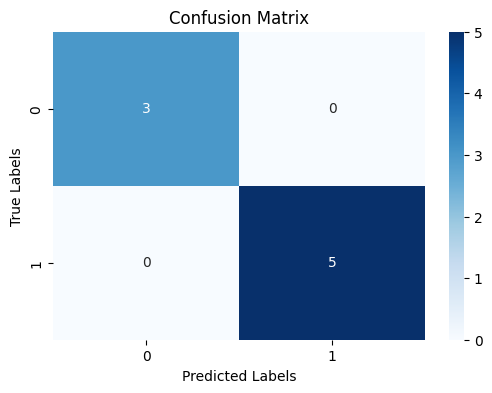

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

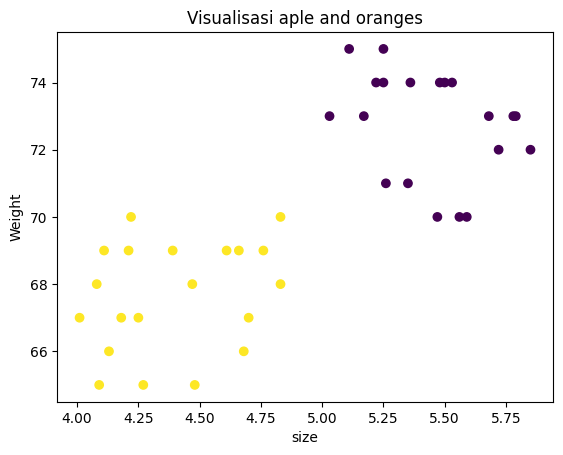

In [26]:
import matplotlib.pyplot as plt

plt.scatter(df['Size'], df['Weight'], c=df['Class'].astype('category').cat.codes)
plt.xlabel('size')
plt.ylabel('Weight')
plt.title('Visualisasi aple and oranges')
plt.show()

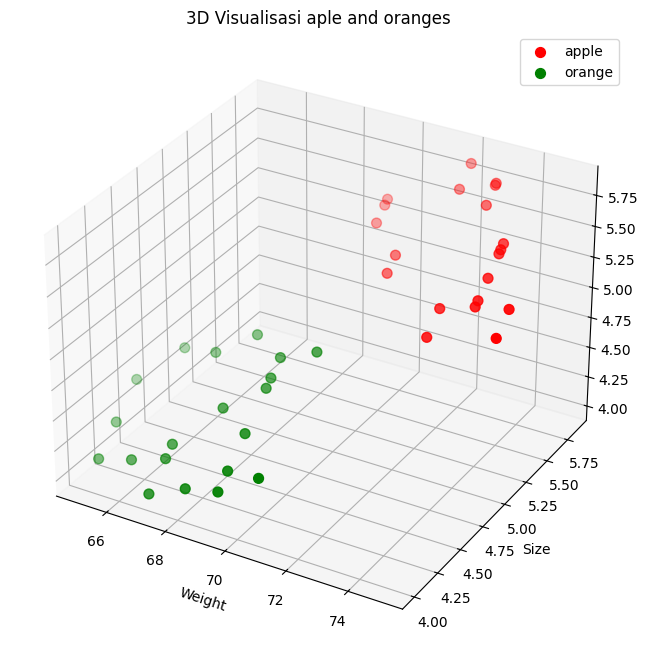

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# 3. Encode label (ubah teks jadi angka)
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# 8. Plot 3D hasil klasifikasi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk tiap kelas
colors = ['r', 'g', 'b']
labels = le.classes_

# Plot tiap spesies dengan warna berbeda
for i, species in enumerate(labels):
    subset = df[df['Class'] == i]
    ax.scatter(
        subset['Weight'],
        subset['Size'],
        subset['Size'],
        color=colors[i],
        label=species,
        s=50
    )

ax.set_xlabel('Weight')
ax.set_ylabel('Size')
ax.set_title('3D Visualisasi aple and oranges')
ax.legend()
plt.show()

In [30]:
print("Data x_train")
display(x_train.head())

print("Data y_train")
display(y_train.head())
model.fit(x_train, y_train)

Data x_train


,Size,Weight
39,5.03,73
6,5.56,70
25,5.35,71
9,4.27,65
13,4.47,68


Data y_train


,Class
39,apple
6,apple
25,apple
9,orange
13,orange


SVC(kernel='linear')